# Redlining Analysis

In [1]:
import pandas as pd
import requests
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import statsmodels.api as sm

## Historical Trends in Redlined Areas

In [2]:
#Import redline map

redline=gpd.read_file('data/CALosAngeles1939')

utm = '+proj=utm +zone=11 +ellps=WGS84 +datum=WGS84 +units=m +no_defs '

redline.to_crs(utm,inplace=True)

In [3]:
#Import census data by decade from NHGIS

thirties_df=pd.read_csv('data/1930/nhgis0026_csv/nhgis0026_ds67_1930_tract.csv')
forties_df=pd.read_csv('data/1940/nhgis0020_csv/nhgis0020_ds76_1940_tract.csv')
fifties_df=pd.read_csv('data/1950/nhgis0021_csv/nhgis0021_ds82_1950_tract.csv')
sixties_df=pd.read_csv('data/1960/nhgis0023_csv/nhgis0023_ds92_1960_tract.csv')
seventies_df1=pd.read_csv('data/1970/nhgis0024_csv/nhgis0024_ds97_1970_tract.csv')
seventies_df2=pd.read_csv('data/1970/nhgis0024_csv/nhgis0024_ds98_1970_tract.csv')
seventies_df3=pd.read_csv('data/1970/nhgis0024_csv/nhgis0024_ds99_1970_tract.csv')
eighties_df1=pd.read_csv('data/1980/nhgis0025_csv/nhgis0025_ds104_1980_tract.csv')
eighties_df2=pd.read_csv('data/1980/nhgis0025_csv/nhgis0025_ds107_1980_tract.csv')


In [4]:
#clean 1930's data - this actually doesn't have complete LA county data

#limit to la
thirties_la=thirties_df[thirties_df['COUNTY'] == 'Los Angeles']

#rename columns
rename={'BOJ001' : 'total_pop', 'BOK001' : 'white1', 'BOK002' : 'white2', 'BOK003' : 'white3','BOK004' : 'black_pop','BOK005' : 'other_nonwhite_pop'}
thirties_la.rename(columns=rename,inplace=True)

#fill nan with 0
columns=['total_pop','white1','white2','white3','black_pop','other_nonwhite_pop']
for col in columns:
    thirties_la[col] = thirties_la[col].fillna(0)
    
#calculate metrics   
thirties_la['nonwhite_pop'] = thirties_la['black_pop']+ thirties_la['other_nonwhite_pop']
thirties_la['white_pop'] = thirties_la['white1'] + thirties_la['white2'] + thirties_la['white3']
thirties_la['pct_white'] = thirties_la['white_pop']/thirties_la['total_pop']
thirties_la['pct_nonwhite'] = thirties_la['nonwhite_pop']/thirties_la['total_pop']
thirties_la['pct_black'] = thirties_la['black_pop']/thirties_la['total_pop']



In [5]:
#clean 1940s data and calculate metrics

#limit to LA
forties_la=forties_df[forties_df['COUNTY']=='Los Angeles']
#rename columns
forties_la.rename(columns={'BUB001' : 'total_pop','BUQ001' : 'white_pop', 'BUQ002' : 'nonwhite_pop'}, inplace=True)

#fill nan with 0
columns=['total_pop','white_pop','nonwhite_pop']
for col in columns:
    forties_la[col] = forties_la[col].fillna(0)

#calculate metrics
forties_la['pct_white'] = forties_la['white_pop']/forties_la['total_pop']
forties_la['pct_nonwhite'] = forties_la['nonwhite_pop']/forties_la['total_pop']

In [6]:
#clean 1950's data

#limit to LA
fifties_la=fifties_df[fifties_df['COUNTY'] == 'Los Angeles']
#rename columns
fifties_la.rename(columns={'BZ8001' : 'total_pop','B0J001' : 'white_pop', 'B0J002' : 'black_pop','B0J003' : 'other_nonwhite_pop','B0F001':'median_income'}, inplace=True)

#fill nan with 0
columns=['total_pop','white_pop','black_pop','other_nonwhite_pop','median_income']
for col in columns:
    fifties_la[col] = fifties_la[col].fillna(0)

#calculate metrics   
fifties_la['nonwhite_pop'] = fifties_la['black_pop']+ fifties_la['other_nonwhite_pop']
fifties_la['pct_white'] = fifties_la['white_pop']/fifties_la['total_pop']
fifties_la['pct_nonwhite'] = fifties_la['nonwhite_pop']/fifties_la['total_pop']
fifties_la['pct_black'] = fifties_la['black_pop']/fifties_la['total_pop']

In [7]:
#clean 1960's data

#limit to LA
sixties_la=sixties_df[sixties_df['COUNTY'] == 'Los Angeles']

#rename columns
rename={'CA4001' : 'total_pop','CA7001' : 'hispanic_pop','B53001' : 'tot_pop_printed',
       'B7B001' : 'white_pop','B7B002' : 'black_pop', 'B7B003' : 'other_nonwhite_pop'}
sixties_la.rename(columns=rename,inplace=True)

#fill nan with 0
columns=['total_pop','hispanic_pop','tot_pop_printed','white_pop','black_pop','other_nonwhite_pop']
for col in columns:
    sixties_la[col] = sixties_la[col].fillna(0)

#calculate metrics
sixties_la['nonwhite_pop'] = sixties_la['total_pop'] - sixties_la['white_pop']
sixties_la['pct_nonwhite'] = sixties_la['nonwhite_pop'] / sixties_la['total_pop']
sixties_la['pct_black'] = sixties_la['black_pop'] / sixties_la['total_pop']
sixties_la['pct_white'] = sixties_la['white_pop'] / sixties_la['total_pop']
sixties_la['pct_hispanic'] = sixties_la['hispanic_pop'] / sixties_la['total_pop']

In [8]:
#clean 1970's data

#limit to LA
seventies_la1=seventies_df1[seventies_df1['COUNTY'] == 'Los Angeles']
seventies_la2=seventies_df2[seventies_df2['COUNTY'] == 'Los Angeles']
seventies_la3=seventies_df3[seventies_df3['COUNTY'] == 'Los Angeles']

#rename columns
rename1={'CY7001' : 'raw_total_pop'}
rename2={'C0X001' : 'white_pop', 'C0X002' : 'black_pop', 'C0X003' : 'other_nonwhite_pop'}
rename3={'C11001' : 'hispanic_1', 'C11002' : 'hispanic_2', 'C11003' : 'hispanic_3','C11004' : 'hispanic_4'}
seventies_la1.rename(columns=rename1,inplace=True)
seventies_la2.rename(columns=rename2,inplace=True)
seventies_la3.rename(columns=rename3,inplace=True)

#merge seventies tables together
seventies_la=pd.merge(seventies_la1,seventies_la2[['GISJOIN','white_pop','black_pop','other_nonwhite_pop']],left_on='GISJOIN',right_on='GISJOIN', how='left')
seventies_la=pd.merge(seventies_la,seventies_la3[['GISJOIN','hispanic_1','hispanic_2','hispanic_3','hispanic_4']],left_on='GISJOIN',right_on='GISJOIN', how='left')

#fill nan with 0
columns=['white_pop','black_pop','other_nonwhite_pop','hispanic_1','hispanic_2','hispanic_3','hispanic_4']
for col in columns:
    seventies_la[col] = seventies_la[col].fillna(0)


#calculate metrics
seventies_la['nonwhite_pop'] = seventies_la['black_pop'] + seventies_la['other_nonwhite_pop']
seventies_la['total_pop'] = seventies_la['white_pop'] + seventies_la['black_pop'] + seventies_la['other_nonwhite_pop']
seventies_la['pct_white'] = seventies_la['white_pop']/seventies_la['total_pop']
seventies_la['pct_nonwhite'] = 1-seventies_la['pct_white']
seventies_la['pct_black'] = seventies_la['black_pop']/seventies_la['total_pop'] 
seventies_la['hispanic_pop'] = seventies_la['hispanic_1'] + seventies_la['hispanic_2'] + seventies_la['hispanic_3'] + seventies_la['hispanic_4']
seventies_la['pct_hispanic']=seventies_la['hispanic_pop']/seventies_la['total_pop']


In [9]:
#clean 1980's data

#limit to LA
eighties_la1=eighties_df1[eighties_df1['COUNTY'] == 'Los Angeles']
eighties_la2=eighties_df2[eighties_df2['COUNTY'] == 'Los Angeles']

#rename columns
rename1={'C7L001' : 'total_pop',
'C9D001':'white_pop',
'C9D002':'black_pop',
'C9D003':'other1',
'C9D004':'other2',
'C9D005':'other3',
'C9D006':'other4',
'C9D007':'other5',
'C9D008':'other6',
'C9D009':'other7',
'C9D010':'other8',
'C9D011':'other9',
'C9D012':'other10',
'C9D013':'other11',
'C9D014':'other12',
'C9D015':'other13',
'C9E001':'not_spanish',
'C9E002':'spanish1-mexican',
'C9E003':'spanish2-puertorican',
'C9E004':'spanish3-cuban',
'C9E005':'spanish4-other',
'C9G001':'spanish-white',
'C9G002':'spanish-black',
'C9G003':'spanish-aapi',
'C9G004':'spanish-other'}
rename2={'DIE001':'median_income'}
eighties_la1.rename(columns=rename1,inplace=True)
eighties_la2.rename(columns=rename2,inplace=True)

#summarize the other pops
eighties_la1['other_nonwhite_pop'] = (eighties_la1['other1']+eighties_la1['other2']+eighties_la1['other3']
                                      +eighties_la1['other4']+eighties_la1['other5']+eighties_la1['other6']
                                      +eighties_la1['other7']+eighties_la1['other8']+eighties_la1['other9']
                                      +eighties_la1['other10']+eighties_la1['other11']+eighties_la1['other12']
                                      +eighties_la1['other13'])

#merge eighties tables together
cols1=['GISJOIN','YEAR','total_pop','white_pop','black_pop','other_nonwhite_pop',
       'spanish1-mexican','spanish2-puertorican','spanish3-cuban','spanish4-other',
      'spanish-white','spanish-black','spanish-aapi','spanish-other','other13']
cols2=['GISJOIN','median_income']

eighties_la=pd.merge(eighties_la1[cols1],eighties_la2[cols2],left_on='GISJOIN',right_on='GISJOIN', how='left')


#calculate metrics
eighties_la['nonwhite_pop'] = eighties_la['black_pop'] + eighties_la['other_nonwhite_pop']
eighties_la['pct_white'] = eighties_la['white_pop']/eighties_la['total_pop']
eighties_la['pct_nonwhite'] = 1-eighties_la['pct_white']
eighties_la['pct_black'] = eighties_la['black_pop']/eighties_la['total_pop'] 
eighties_la['hispanic_pop'] = (eighties_la['spanish1-mexican'] + eighties_la['spanish2-puertorican'] 
                               + eighties_la['spanish3-cuban'] + eighties_la['spanish4-other'])
eighties_la['pct_hispanic'] = eighties_la['hispanic_pop']/eighties_la['total_pop']

                                                                                                                       



In [10]:
#import tract shapefiles by decade

#import 30s
thirties_gdf=gpd.read_file('data/1930/nhgis0026_shape/nhgis0026_shapefile_tl2000_us_tract_1930')
#crs
thirties_gdf=thirties_gdf.to_crs(utm)

#import 40s
forties_gdf=gpd.read_file('data/1940/nhgis0020_shape/nhgis0020_shapefile_tl2000_us_tract_1940/tract')
#remove islands
forties_gdf=forties_gdf[~forties_gdf['GISJOIN2'].isin(['06003700567','06003700568'])]
forties_gdf=forties_gdf.to_crs(utm)

#import 50s
fifties_gdf=gpd.read_file('data/1950/nhgis0022_shape/nhgis0022_shapefile_tl2000_us_tract_1950')
#remove islands
fifties_gdf=fifties_gdf[~fifties_gdf['GISJOIN2'].isin(['06003700567','06003700568'])]
fifties_gdf=fifties_gdf.to_crs(utm)

#import 60s
sixties_gdf=gpd.read_file('data/1960/nhgis0023_shape/nhgis0023_shapefile_tl2000_us_tract_1960')
#remove islands
sixties_gdf=sixties_gdf[~sixties_gdf['GISJOIN2'].isin(['06003705990','06003705991'])]
sixties_gdf=sixties_gdf.to_crs(utm)

#import 70s
seventies_gdf=gpd.read_file('data/1970/nhgis0024_shape/nhgis0024_shapefile_tl2000_us_tract_1970')
#remove islands
seventies_gdf=seventies_gdf[~seventies_gdf['GISJOIN2'].isin(['06003705990','06003705991'])]
seventies_gdf=seventies_gdf.to_crs(utm)

#import 80s
eighties_gdf=gpd.read_file('data/1980/nhgis0025_shape/nhgis0025_shapefile_tl2000_us_tract_1980/tract')
#remove islands
eighties_gdf=eighties_gdf[~eighties_gdf['GISJOIN2'].isin(['06003705990','06003705991'])]
eighties_gdf=eighties_gdf.to_crs(utm)

In [11]:
#merge decade data with decade tract shapefiles

thirties_data=pd.merge(thirties_gdf,thirties_la,left_on='GISJOIN', right_on='GISJOIN', how='inner')
forties_data=pd.merge(forties_gdf,forties_la,left_on='GISJOIN', right_on='GISJOIN', how='inner')
fifties_data=pd.merge(fifties_gdf,fifties_la, left_on='GISJOIN',right_on='GISJOIN', how='inner')
sixties_data=pd.merge(sixties_gdf,sixties_la, left_on='GISJOIN',right_on='GISJOIN', how='inner')
seventies_data=pd.merge(seventies_gdf,seventies_la,left_on='GISJOIN',right_on='GISJOIN',how='inner')
eighties_data=pd.merge(eighties_gdf,eighties_la,left_on='GISJOIN',right_on='GISJOIN',how='inner')

In [12]:
#generate dfs of tract GEOIDs and holc grades for each decade by spatial joining tracts to redlining map

dfs=[forties_data,fifties_data,sixties_data,seventies_data,eighties_data]
grade_list=[]

for df in dfs:
    df['centroid'] = df.centroid  #generate centroid of every tract
    df.set_geometry('centroid',inplace=True) #set as geom
    decade_grades=gpd.sjoin(df,redline,how='left',op='within') #identify grade of each tract based on grade area its centroid is in
    decade_grades=decade_grades[['GISJOIN','holc_grade']] #limit to just these columns
    grade_list.append(decade_grades) #append to grade list
    df.set_geometry('geometry',inplace=True)


In [13]:
#link the HOLC grade to the gdf with the data
forties_data=forties_data.merge(grade_list[0],left_on='GISJOIN',right_on='GISJOIN',how='left')
forties_data['holc_grade'].fillna('No_Grade',inplace=True)

fifties_data=fifties_data.merge(grade_list[1],left_on='GISJOIN',right_on='GISJOIN',how='left')
fifties_data['holc_grade'].fillna('No_Grade',inplace=True)

sixties_data=sixties_data.merge(grade_list[2],left_on='GISJOIN',right_on='GISJOIN',how='left')
sixties_data['holc_grade'].fillna('No_Grade',inplace=True)

seventies_data=seventies_data.merge(grade_list[3],left_on='GISJOIN',right_on='GISJOIN',how='left')
seventies_data['holc_grade'].fillna('No_Grade',inplace=True)

eighties_data=eighties_data.merge(grade_list[4],left_on='GISJOIN',right_on='GISJOIN',how='left')
eighties_data['holc_grade'].fillna('No_Grade',inplace=True)  
    

In [14]:
#Create a summary table of demographics in each grade by decade

dfs=[forties_data,fifties_data,sixties_data,seventies_data,eighties_data]

#empty summary df
grade_year=pd.DataFrame(columns=['holc_grade','YEAR','total_pop', 'white_pop', 'nonwhite_pop', 'black_pop']).set_index(['holc_grade','YEAR'])

#fill summary df
#loop through each decade, summarize population data by holc_grade and year
#and concat to summary df. 1940 is separate bc its missing the black pop metric

col40=['total_pop','white_pop','nonwhite_pop']
col_oth=['total_pop','white_pop','nonwhite_pop','black_pop']
groupby=['holc_grade','YEAR']

for df in dfs:
    if df['YEAR'][0] == 1940:
        grade_year=pd.concat([grade_year,df.groupby(groupby)[col40].sum()],axis=0)
    else:
        grade_year=pd.concat([grade_year,df.groupby(groupby)[col_oth].sum()],axis=0)


#Calculate metrics
grade_year.reset_index(inplace=True)
grade_year['pct_nonwhite'] = grade_year['nonwhite_pop']/grade_year['total_pop']
grade_year['pct_black'] = grade_year['black_pop']/grade_year['total_pop']

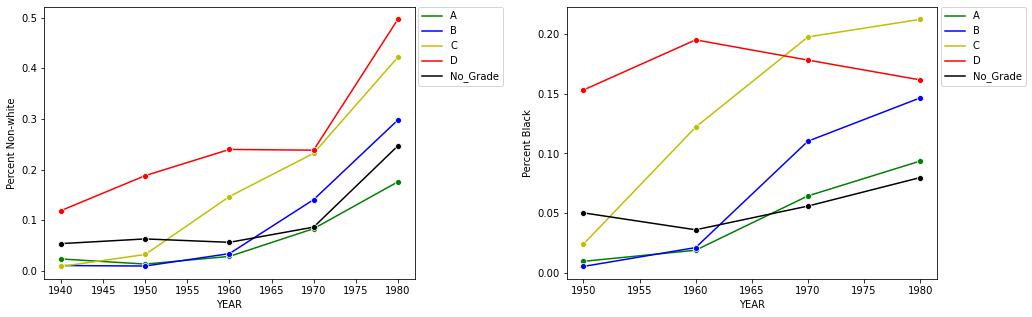

In [15]:
#line graph summarizing demographic trends in each HOLC area by decade

fig,axes=plt.subplots(nrows=1, ncols=2,figsize=(16,5), gridspec_kw={'wspace' : .41})
metric=['pct_nonwhite','pct_black']
titles=['Percent Non-white','Percent Black']


for ax, met, t in zip(axes.flat, metric, titles):
    sns.lineplot(x='YEAR',y=met,
             data=grade_year,
             hue='holc_grade',
             estimator=None,
             marker='o',
             ax=ax,
             palette=['g','b','y','r','black'])
    ax.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
    ax.set_ylabel(t)
plt.gcf().savefig('historical_trends.png', bbox_inches='tight')

D and C graded areas change substantially relative to other areas, but other graded areas of converging

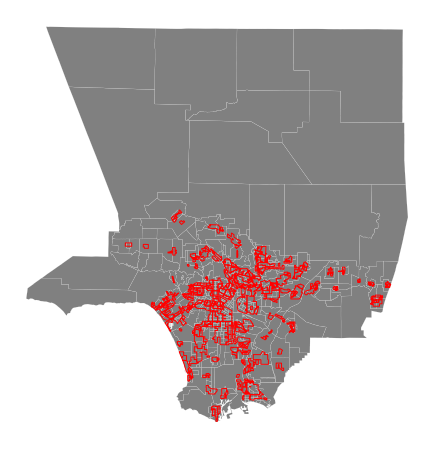

In [16]:
#show where in LA county was redlined
ax=forties_data.plot(color='grey',edgecolor='white',figsize=(10,8),linewidth=.1)
redline[redline['holc_grade'].isin(['C','D'])].plot(color='none',edgecolor='red',ax=ax,vmax=1,vmin=0)
ax.set_axis_off()
plt.gcf().savefig('redlined_areas.png', bbox_inches='tight')

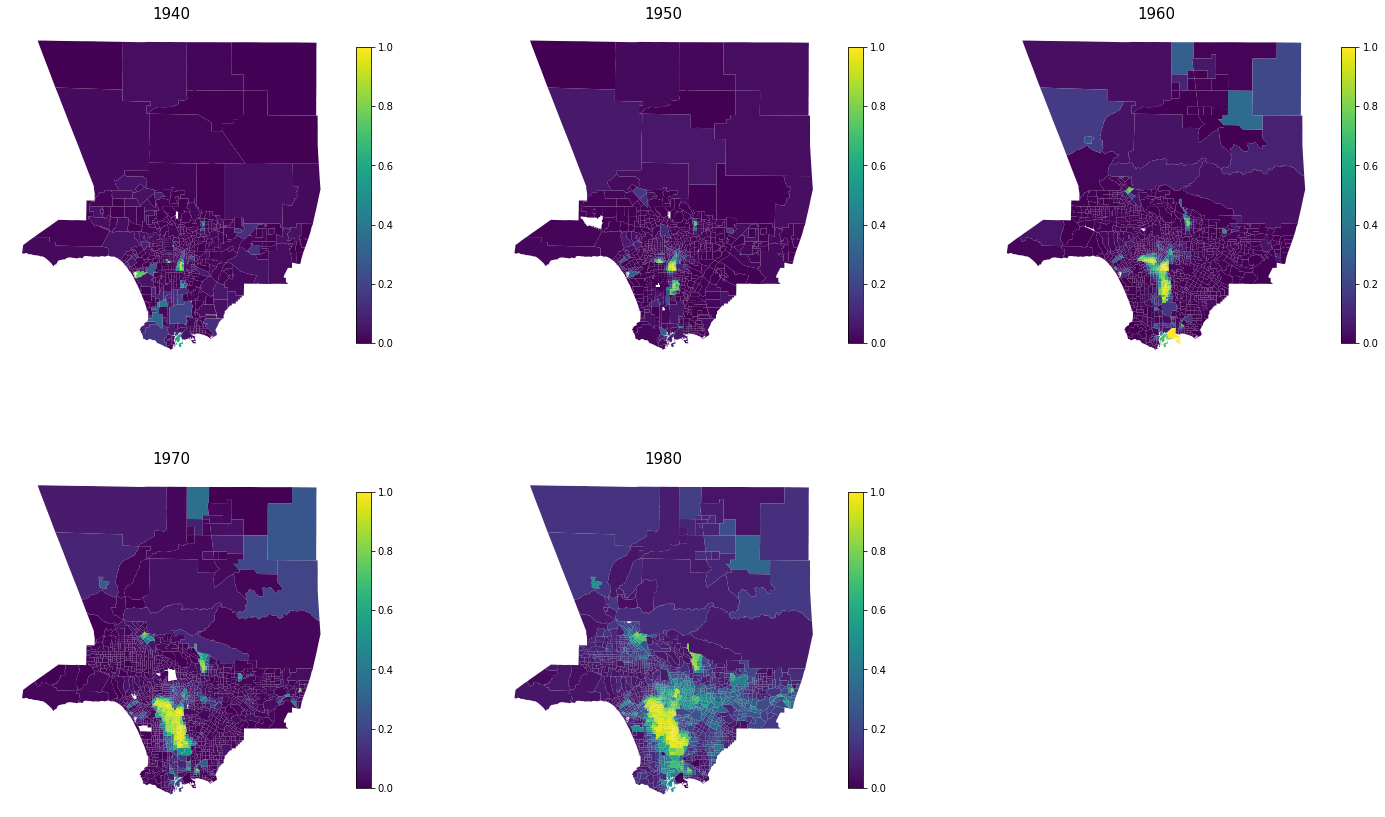

In [17]:
#map the areas by decade with percent non-white population and compare to redlined (C and D graded) areas

fig,ax=plt.subplots(nrows=2, ncols=3, figsize=(25,15),gridspec_kw={'hspace' : -.40, 'wspace' : .1})
fontsize=15

#all by decadeb

ax1=plt.subplot(2,3,1)
forties_data.plot('pct_nonwhite', legend=True, legend_kwds={'shrink' : .8},ax=ax1,vmax=1,vmin=0)
ax1.set_axis_off()
ax1.set_title('1940',fontsize=fontsize)


ax2=plt.subplot(2,3,2)
fifties_data.plot('pct_nonwhite', legend=True, legend_kwds={'shrink' : .8},ax=ax2,vmax=1,vmin=0)
ax2.set_axis_off()
ax2.set_title('1950',fontsize=fontsize)


ax3=plt.subplot(2,3,3)
sixties_data.plot('pct_nonwhite', legend=True, legend_kwds={'shrink' : .8},ax=ax3,vmax=1,vmin=0)
ax3.set_axis_off()
ax3.set_title('1960',fontsize=fontsize)


ax4=plt.subplot(2,3,4)
seventies_data.plot('pct_nonwhite', legend=True, legend_kwds={'shrink' : .8},ax=ax4,vmax=1,vmin=0)
ax4.set_axis_off()
ax4.set_title('1970',fontsize=fontsize)


ax5=plt.subplot(2,3,5)
eighties_data.plot('pct_nonwhite', legend=True, legend_kwds={'shrink' : .8},ax=ax5,vmax=1,vmin=0)
ax5.set_axis_off()
ax5.set_title('1980',fontsize=fontsize)

#fig.delaxes(ax[1][2])
plt.gcf().savefig('historical_maps.png', bbox_inches='tight')

The nonwhite population definitely grew in the areas that were redlined and the population was very concentrated over the whole period. I wonder if the 1980 definition changed...

## Present Day Analysis

In [18]:
#Import tract sociodemographic data from 2014-2018

data=pd.read_csv('data/2018/nhgis0027_csv/nhgis0027_ds239_20185_2018_tract.csv')

In [19]:
#Limit data to los angeles

la_data=data[data['COUNTY']=='Los Angeles County']

In [20]:
#clean the data


#rename columns
rename={'AJWME001' : 'total_pop',
        'AJWNE002' : 'white_pop',
        'AJWNE003' : 'black_pop',
        'AJWNE004' : 'other1',
        'AJWNE005' : 'other2',
        'AJWNE006' : 'other3',
        'AJWNE007' : 'other4',
        'AJWNE008' : 'other5',
        'AJWVE003' : 'nonh_white_pop',
        'AJWVE004' : 'nonh_black_pop',
        'AJWVE005' : 'nonh_other_1',
        'AJWVE006' : 'nonh_other_2',
        'AJWVE007' : 'nonh_other_3',
        'AJWVE008' : 'nonh_other_4',
        'AJWVE009' : 'nonh_other_5',
        'AJWVE012' : 'hispanic_pop',
        'AJZAE001' : 'median_income',
        'AJ1UE001' : 'total_units',
        'AJ1UE002' : 'owner_units',
        'AJ1UE003' : 'rental_units'}
        
la_data.rename(columns=rename, inplace=True)

#fill nan with 0
columns=['total_pop','white_pop','black_pop','other1','other2',
         'other3','other4','other5','nonh_white_pop','nonh_black_pop',
         'nonh_other_1','nonh_other_2','nonh_other_3','nonh_other_4',
         'nonh_other_5','hispanic_pop','median_income','total_units','owner_units','rental_units']

for col in columns:
    la_data[col] = la_data[col].fillna(0)


#calc metrics
la_data['other_nonwhite_pop'] = la_data['other1'] + la_data['other2'] + la_data['other3'] +la_data['other4'] + la_data['other5']
la_data['pct_white'] = la_data['white_pop']/la_data['total_pop']
la_data['pct_nonwhite'] = 1-la_data['pct_white']
la_data['pct_black'] = la_data['black_pop'] / la_data['total_pop']
la_data['nonwhite_pop'] = la_data['black_pop'] + la_data['other_nonwhite_pop']

la_data['pct_nonh_white'] = la_data['nonh_white_pop']/la_data['total_pop']
la_data['pct_nonh_black'] = la_data['nonh_black_pop']/la_data['total_pop']
la_data['pct_hispanic'] = la_data['hispanic_pop']/la_data['total_pop']
la_data['nonh_other_pop'] = la_data['nonh_other_1'] + la_data['nonh_other_2'] + la_data['nonh_other_3'] + la_data['nonh_other_4'] + la_data['nonh_other_5']
la_data['pct_nonh_other'] = la_data['nonh_other_pop']/la_data['total_pop']

la_data['owner_rate'] = la_data['owner_units']/la_data['total_units']


In [21]:
#import 2018 tigerline tract from nhgis and align CRS
gdf=gpd.read_file('data/2018/nhgis0027_shape/nhgis0027_shapefile_tl2018_us_tract_2018')
gdf.to_crs(utm,inplace=True)

#remove islands
islands=['06037599000','06037599100']
gdf=gdf[~gdf['GEOID'].isin(islands)]

In [22]:
#merge data to tract shapefile

la_data_gdf=pd.merge(gdf,la_data,left_on='GISJOIN',right_on='GISJOIN',how='inner')

In [23]:
#identify the grade each tract received

#generate centroid
la_data_gdf['centroid']=la_data_gdf.centroid

#spatial join to get grade for each tract
la_data_gdf.set_geometry('centroid',inplace=True)
la_tract_grades=gpd.sjoin(la_data_gdf,redline,how='left',op='within')
la_tract_grades=la_tract_grades[['GISJOIN','holc_grade']]

#reset geom
la_data_gdf.set_geometry('geometry',inplace=True)


In [24]:
#merge grade into data and fill nan with "no grade"

#merge
la_data_gdf=la_data_gdf.merge(la_tract_grades,left_on='GISJOIN',right_on='GISJOIN',how='left')

#fill nana
la_data_gdf['holc_grade']=la_data_gdf['holc_grade'].fillna('No Grade')

#create a dummy variable for if the tract is C or D graded
la_data_gdf['redline_dummy'] = np.where(la_data_gdf['holc_grade'].isin(['C','D']),1,0)

#build the tract geoid
la_data_gdf['geoid']=la_data_gdf['TRACTA'].apply(lambda x: '06037'+ str(x))

In [25]:
#Calculate descriptive statistics for tracts in each grade area

#limit to these columns
colmns=['black_pop','nonwhite_pop','white_pop','total_pop','total_units','owner_units',
        'nonh_white_pop','nonh_black_pop','hispanic_pop','median_income']

#summarize those columns by holc grade
agg={c:sum for c in colmns}
agg['median_income'] = 'mean'
grade_summary=la_data_gdf.groupby('holc_grade').agg(agg)

#calculate summary metrics by grade
grade_summary['pct_white'] = grade_summary['nonh_white_pop']/grade_summary['total_pop']
grade_summary['pct_own'] = grade_summary['owner_units']/grade_summary['total_units']
grade_summary['pct_nonwhite'] = 1-grade_summary['pct_white']
grade_summary['pct_black'] = grade_summary['nonh_black_pop']/grade_summary['total_pop']
grade_summary['pct_hispanic'] = grade_summary['hispanic_pop']/grade_summary['total_pop']

#show summary metrics
grade_summary[['pct_white','pct_own','pct_nonwhite','pct_black','pct_hispanic', 'median_income']]

,pct_white,pct_own,pct_nonwhite,pct_black,pct_hispanic,median_income
holc_grade,,,,,,
A,0.555963,0.640915,0.444037,0.085484,0.157376,120843.404762
B,0.387693,0.431226,0.612307,0.090568,0.359820,77884.481013
C,0.205775,0.295884,0.794225,0.093580,0.527344,54374.357401
D,0.152058,0.287638,0.847942,0.078829,0.647087,52262.640288
No Grade,0.287090,0.563029,0.712910,0.071055,0.457017,75411.720397


C and D graded areas are less white, less likely to own, lower income, and more hispanic.

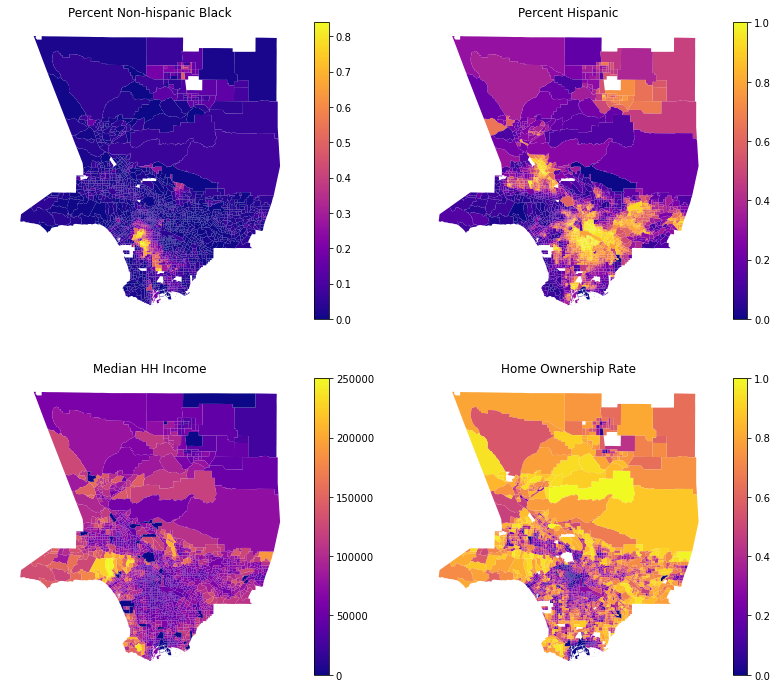

In [26]:
#show maps of sociodemographic indicators

#map these indicators
maps=['pct_nonh_black','pct_hispanic','median_income','owner_rate']

#create fig and titles
fig,ax=plt.subplots(nrows=2,ncols=2,figsize=(15,12),gridspec_kw={'wspace' : 0})
titles=['Percent Non-hispanic Black','Percent Hispanic','Median HH Income','Home Ownership Rate']

#plot
for a,m,t in zip(ax.flat,maps,titles):
    la_data_gdf.plot(column=m,ax=a,cmap='plasma',legend=True)
    a.set_axis_off()
    a.set_title(t)
    
plt.gcf().savefig('present_maps.png', bbox_inches='tight')

## Regression Analysis

Even after accounting for Race/Ethnicity and income do redlined areas have fewer owners?

In [27]:
#create model dataset
model_df=la_data_gdf[['GISJOIN','geoid','owner_rate','median_income','pct_nonh_white','pct_nonh_black','pct_hispanic','pct_nonh_other','holc_grade','redline_dummy']]
model_df=model_df.dropna()

#make metrics more easily interpretable

#turn proportions into percentage points
metrs=['owner_rate','pct_nonh_white','pct_nonh_black','pct_hispanic','pct_nonh_other']
for m in metrs:
    model_df[m] = model_df[m]*100

#median income in thousands
model_df['median_income'] = model_df['median_income']/1000

In [28]:
X=model_df[['median_income','pct_nonh_black','pct_nonh_other','pct_hispanic','redline_dummy']]
Y=model_df['owner_rate']
X=sm.add_constant(X)

model=sm.OLS(Y,X).fit(cov_type='HC1')
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             owner_rate   R-squared:                       0.598
Model:                            OLS   Adj. R-squared:                  0.597
Method:                 Least Squares   F-statistic:                     520.2
Date:                Tue, 18 May 2021   Prob (F-statistic):               0.00
Time:                        01:56:27   Log-Likelihood:                -9806.1
No. Observations:                2317   AIC:                         1.962e+04
Df Residuals:                    2311   BIC:                         1.966e+04
Df Model:                           5                                         
Covariance Type:                  HC1                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -15.7107      2.841     -5.

Even after accounting for income and discrimination that face minority residents, previously redlined areas are associated with  15 percentage points less ownership. 

## CRA and Homeownership
The Community Reinvestment Act is supposed to be one of the tools to combat previous discrimination by requiring local banks to make loans in low income census tracts. This section adds an indicator to the above regression to test.

In [29]:
#import CRS eligible tract indicators
cra_eligible=pd.read_csv('data/cra_eligibility.csv',dtype={'Formatted FIPS': str}).rename(columns={'Formatted FIPS' : 'geoid',
                'Tract status for Community Reinvestment Act (CRA) eligibility, a' : 'eligibility'}).dropna()

In [30]:
#create dummy variable for whether tract is CRA eligible or not
cra_eligible['eligibility_dummy']= (cra_eligible['eligibility'] != 'Not Eligible').astype(int)

In [31]:
#merge modeling data and cra eligiblility data
model_cra_df=pd.merge(model_df,cra_eligible[['geoid','eligibility_dummy']],
                     left_on='geoid', right_on='geoid', how='inner')
model_cra_df['redline_cra_interact']= model_cra_df['redline_dummy']*model_cra_df['eligibility_dummy']

In [32]:
X=model_cra_df[['median_income','pct_nonh_black','pct_nonh_other','pct_hispanic','redline_dummy','eligibility_dummy','redline_cra_interact']]
Y=model_cra_df['owner_rate']
X=sm.add_constant(X)

model=sm.OLS(Y,X).fit(cov_type='HC1')
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             owner_rate   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.652
Method:                 Least Squares   F-statistic:                     668.0
Date:                Tue, 18 May 2021   Prob (F-statistic):               0.00
Time:                        01:56:27   Log-Likelihood:                -9633.2
No. Observations:                2316   AIC:                         1.928e+04
Df Residuals:                    2308   BIC:                         1.933e+04
Df Model:                           7                                         
Covariance Type:                  HC1                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -3.8039 

Being CRA elgible is associated with lower lending. There is likely a lot of omitted variables and so this is not all that useful for assessing the CRA


## CRA and Mortgage Lending
A normal OLS regression is not a good way to assess the effect of the CRA on ownership. In this section we will use an Regression Discontinuity of CRA eligibility on mortgage lending. Tracts whose median family income is less than 120% of the Area median family income are CRA eligible, so the discontinuity is at 120 MFI.

In [33]:
# import home purchase lending data

loans2017=pd.read_csv('data/loans_2017.csv', 
                      dtype={'Formatted FIPS': str}).rename(columns={'Formatted FIPS' : 'geoid',
                                                                     'Number of home purchase loans in 2017.' : 'loans'})
loans2018=pd.read_csv('data/loans_2018.csv', 
                      dtype={'Formatted FIPS': str}).rename(columns={'Formatted FIPS' : 'geoid', 
                                                                     'Number of home purchase loans in 2018.' : 'loans'})
loans2019=pd.read_csv('data/loans_2019.csv', 
                      dtype={'Formatted FIPS': str}).rename(columns={'Formatted FIPS' : 'geoid', 
                                                                     'Number of home purchase loans in 2019.' : 'loans'})

In [34]:
#concatenate 2017 to 2019 loan counts together
loans=pd.concat([loans2017,loans2018,loans2019]).groupby('geoid')['loans'].sum().reset_index()

In [35]:
#import tract mfi
tract_mfi=pd.read_csv('data/percent_mfi.csv', 
                      dtype={'Formatted FIPS': str}).rename(columns={'Formatted FIPS' : 'geoid',
                                                                     'Census tract Median Family Income as a percent of Area Median Fa' : 'percent_mfi'})

In [36]:
#merge tract mfi and loans
loan_mfi=pd.merge(loans,tract_mfi[['geoid','percent_mfi']], left_on='geoid', right_on='geoid', how='left').dropna()

<AxesSubplot:xlabel='percent_mfi', ylabel='loans'>

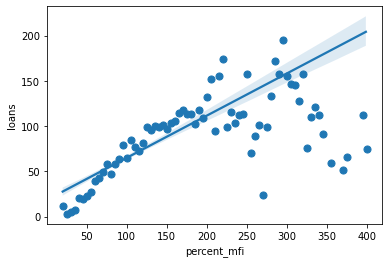

In [37]:
# take a look at the raw data 
xbins=[i for i in range(0,500,5)]
sns.regplot(data=loan_mfi, x='percent_mfi',y='loans',x_bins=xbins, x_ci=None)

Mortgage lending gets funky at higher levels of MFI. Look at narrower band around 120% MFI

In [38]:
# calculate the treatment dummy, the running variable, and the variable for different linear slopes

loan_mfi['cra_elig'] = np.where(loan_mfi['percent_mfi']<=120,1,0) # treatment dummy
loan_mfi['cra_running'] = loan_mfi['percent_mfi'] - 120 # running variable
loan_mfi['running_elig_interaction'] = loan_mfi['cra_elig']*loan_mfi['cra_running'] # different slopes

In [39]:
# limit bandwidth to between -100% and 200% MFI
loan_mfi_rdd=loan_mfi[loan_mfi['percent_mfi'] <=200]

#regression model
x=loan_mfi_rdd[['cra_elig','cra_running','running_elig_interaction']]
y=loan_mfi_rdd['loans']
x=sm.add_constant(x)

#fit
model=sm.OLS(y,x).fit(cov_type='HC1')
print(model.summary())

#merge fitted values
loan_mfi_rdd['fitted_vals']=model.fittedvalues

                            OLS Regression Results                            
Dep. Variable:                  loans   R-squared:                       0.246
Model:                            OLS   Adj. R-squared:                  0.245
Method:                 Least Squares   F-statistic:                     258.2
Date:                Tue, 18 May 2021   Prob (F-statistic):          1.30e-142
Time:                        01:56:28   Log-Likelihood:                -11384.
No. Observations:                2105   AIC:                         2.278e+04
Df Residuals:                    2101   BIC:                         2.280e+04
Df Model:                           3                                         
Covariance Type:                  HC1                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

#### Result: CRA eligibility has no significant impact on mortgage lending in Los Angeles

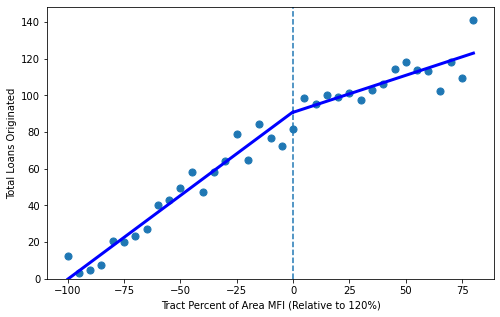

In [40]:
# Plot results showing no effect at the threshold

fig,ax=plt.subplots(figsize=(8,5))

#bins
xbins=[i for i in range(-100,250,5)]

#plot binned scatter
sns.regplot(data=loan_mfi_rdd,
            x='cra_running',
            y='loans', 
            x_bins=xbins,
            fit_reg=False, 
            x_ci=False,
            ax=ax)

#plot the fitted values
sns.lineplot(data=loan_mfi_rdd, x='cra_running',y='fitted_vals',
             ax=ax,color='blue',linewidth=3)

#format
ax.set_ylim(0)
ax.set_xlabel('Tract Percent of Area MFI (Relative to 120%)')
ax.set_ylabel('Total Loans Originated')

#Show line where we would expect a discontinuity
ax.vlines(x=0,ymin=0,ymax=150,linestyle='dashed')

plt.gcf().savefig('RD_graph.png',bbox_inches='tight')